# 1 - Implantation de l’algorithme

## 1.2 Ecriture de l’algorithme


La mise en oeuvre de cet algorithme nécessite de manipuler des vecteurs et
de procéder à des calculs vectoriels simples (addition, soustraction et multiplication de vecteurs). L’utilisation de la bibliothèque NumPy est donc conseillée.

Pour implanter l’algorithme en Python et le rendre facilement réutilisable,
nous allons nous inspirer de la bibliothèque Scikit-Learn, dans laquelle les classifieurs supervisés sont implantés en tant que classes d’objets munis :
- de la méthode spéciale __init__() qui fournit les paramètres au moment
de la création de l’objet classifieur,
- et de deux méthodes principales : la méthode fit() qui réalise l’apprentissage et la méthode predict() qui réalise la prédiction à partir du
modèle appris.

Vous devez écrire le code d’une classe Perceptron dans un fichier que vous
pourrez appeler perceptron.py. Cette classe doit comprendre les trois méthodes suivantes :

- la méthode spéciale __init__(self, dimension, max_iter, learning_rate)
qui crée l’objet classifieur et lui fournit les paramètres suivants :
	- dimension : dimension d des vecteurs d’entrée (nombre de caractéristiques de chaque entrée)
	- max_iter : nombre maximal d’itérations de l’algorithme
	- learning_rate : pas d’apprentissage

La méthode doit aussi initialiser les coefficients de l’hyperplan (vecteur
ω et réel ω0). L’initialisation peut se faire par tirage aléatoire en utilisant des fonctions de la bibliothèque Random pour les réels et du module
random de NumPy pour les vecteurs.

- la méthode fit(self,X,y) qui réalise l’apprentissage à partir des données d’entraînement : entrées X et sorties y. X est une liste de vecteurs
NumPy de dimension dimension et y est un vecteur NumPy contenant
les classes / labels (-1 ou +1) correspondant aux vecteurs d’entrée. Cette
méthode ne retourne pas de résultat, elle correspond à l’algorithme du
Perceptron et met à jour les coefficients de l’hyperplan (vecteur ω et réel
ω0).
Remarque : le nombre de données correspond à la taille de la liste X et à
la dimension du vecteur y.
- la méthode predict(self,x) qui réalise la prédiction de la classe pour
une nouvelle entrée x, qui est un vecteur NumPy de dimension dimension. Cette méthode retourne la valeur prédite (-1 ou +1) pour la donnée
x. Remarque : il est également possible de réaliser une version itérée de
cette méthode prenant en paramètre une liste de vecteurs d’entrée et retournant la liste des prédictions correspondantes.

Il est bien entendu possible d’ajouter d’autres méthodes à cette classe pour
des besoins de calculs intermédiaires ou de structuration dans l’algorithme.

In [3]:
import numpy as np

def add_bias_column(array):
    return np.c_[array, np.ones((array.shape[0]))]

class Perceptron:
    def __init__(self, dimension, max_iter, learning_rate):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

        bonus_bias_column = 1
        self.weights = np.random.rand(dimension + bonus_bias_column) / np.sqrt(dimension)


    def step(self, x):
        return 1 if x > 0 else 0

    def fit(self, inputs, outputs): 
        # bias permet de deplacer la droite initialement bloquée à l'origine
        inputs = add_bias_column(inputs)
                
        for iteration in np.arange(0, self.max_iter):
            for (input, target) in zip(inputs, outputs):

                dotted = np.dot(input, self.weights)
                prediction = self.step(dotted)

                if prediction != target:
                    error = prediction - target

                    # error for the sign
                    self.weights += -self.learning_rate * error * input

    def predict(self, data):
        data = np.atleast_2d(data)
        data = add_bias_column(data)

        dotted = np.dot(data, self.weights)
        return self.step(dotted)

Pour bien comprendre comment les objets de cette classe peuvent être utilisés
et faire une première validation de votre code, voici un exemple de session Python (à écrire dans un autre fichier, par exemple perceptron_test.py) qui crée
une instance de la classe Perceptron et utilise les méthodes fit() et predict()
pour l’entraînement et la prédiction.

Remarque : cet exemple correspond à l’implémentation d’un ET logique à 2
entrées (la sortie 1 correspondant au résultat VRAI "1" et la sortie -1 correspondant au résultat FAUX "0").

```python
import numpy as np
from perceptron import Perceptron

# creation des donnees apprentissage
# entrees : 4 vecteurs d’entree de dimension 2
X_train = [ ]
X_train.append(np.array([1,1]))
X_train.append(np.array([1,0]))
X_train.append(np.array([0,1]))
X_train.append(np.array([0,0]))

# sorties : classes correspondant aux 4 entrees
y_train = np.array([1,-1,-1,-1])

# creation du classifieur
perceptron = Perceptron(dimension=2, max_iter=100, learning_rate=0.1)

# entrainement du classifieur −> calcul des coefficients de l’hyperplan
perceptron.fit(X_train,y_train)

# prediction de nouvelles entrees
new_x = np.array([1,1])
pr int (perceptron.predict(new_x))

new_x = np.array([0,1])
pr int (perceptron.predict(new_x))
```

In [4]:
import numpy as np

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [0], [0], [1]])

print("[INFO] training perceptron...")
p = Perceptron(inputs.shape[1], 20, 0.1)
p.fit(inputs, outputs)

print("[INFO] testing perceptron...")

for (prediction, target) in zip(inputs, outputs):
	pred = p.predict(prediction)
	print("[INFO] data={}, ground-truth={}, pred={}".format(prediction, target[0], pred))

[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=0
[INFO] data=[1 0], ground-truth=0, pred=0
[INFO] data=[1 1], ground-truth=1, pred=1


# 2 - Validation de l’algorithme


Afin de valider votre algorithme, vous allez utiliser un jeu de données d’apprentissage existant téléchargeable à partir du dépôt "UCI Machine Learning
Repository", également accessible sur MyLearningSpace sous le nom iris.csv.
Commencez par ouvrir le fichier pour le visualiser.

Le fichier comprend des données sur 150 fleurs d’iris : leurs caractéristiques
(longueur et largeur des sépales, longueur et largeur des pétales) ainsi que leur
espèce, c’est-à-dire leur classe (setosa, versicolor ou virginica). C’est un exemple
classique très utilisé dans les tutoriels d’apprentissage.

L’objectif est de faire une classification des fleurs d’iris, c’est-à-dire de retrouver leur espèce à partir de leurs caractéristiques. Dans le cas présent, puisque
le perceptron est un classifieur binaire, on se limitera à deux espèces : setosa
et versicolor, qui correspondent aux 100 premières données du fichier. De plus
pour pouvoir visualiser les données, on se limitera à deux caractéristiques : la longueur des sépales et la longueur des pétales.

Le code suivant vous permet :
- de charger le jeu de données depuis le fichier
- de le transformer en tableau Pandas
- d’extraire les données exploitables pour la validation
- d’obtenir une première visualisation des données

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv( "iris.csv")

X_data = df.iloc[0:100, [0, 2]].values

y_data = df.iloc[0:100, 4].values

y_data = np.where(y_data=="setosa", 0, 1)

colors = {0: "red", 1 : "blue" }

y_colors = [colors[y] for y in y_data ]

plt.scatter(X_data[:, 0], X_data[:, 1], c=y_colors, s=100)
plt.show()
```

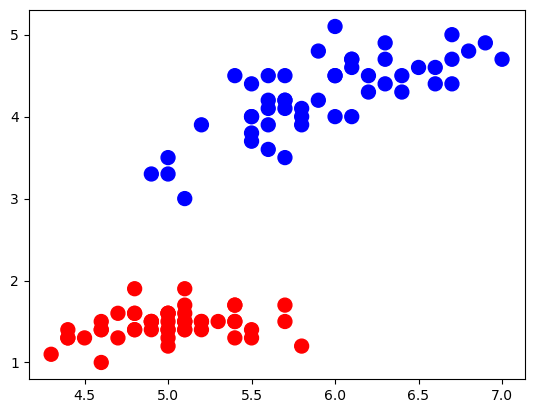

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv( "iris.csv")

X_data = df.iloc[0:100, [0, 2]].values

y_data = df.iloc[0:100, 4].values

y_data = np.where(y_data=="setosa", 0, 1)

colors = {0: "red", 1 : "blue" }

y_colors = [colors[y] for y in y_data ]

plt.scatter(X_data[:, 0], X_data[:, 1], c=y_colors, s=100)
plt.show()


En examinant le nuage de points, on peut observer que les données sélectionnées sont linéairement séparables (ce n’est pas forcément le cas si on choisit d’autres classes et d’autres caractéristiques, vous pouvez tester).

Avant d’entraîner le perceptron, vous devez d’abord séparer les données en
deux ensembles : un jeu d’entraînement et un jeu de test. L’utilisation de la
fonction train_test_split() de Scikit-Learn vue en cours vous permet d’obtenir ces deux ensembles en une seule instruction. Vous pouvez utiliser les noms
usuels pour les variables retournées par la fonction : X_train, X_test, y_train
et y_test. Cette fonction peut être importée dans le code comme indiqué ci-dessous.

```python
from sklearn.model_selection import train_test_split
```

In [6]:
from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(X_data, y_data)

Vous pouvez à présent créer une instance du classifieur et réaliser l’apprentissage sur le jeu d’entraînement à l’aide de la méthode fit(). Vous pouvez
ensuite afficher les valeurs des coefficients ω et w0 calculés par l’algorithme du
perceptron.

In [7]:
perceptron = Perceptron(2, 20, 0.1)

perceptron.fit(input_train, output_train)

Il est ensuite possible d’effectuer des prédictions de classes sur le jeu de
test avec la méthode predict(). Il est intéressant de visualiser les résultats en
comparant les classes prédites avec les vraies classes attendues par un affichage approprié (une boucle d’affichage des classes prédites et de test suffit dans un
premier temps).

In [8]:
output_prediction = [perceptron.predict(input) for input in input_test]

for (prediction, target) in zip(output_prediction, output_test):
	print("prediction : {}, actual : {}".format(prediction, target))

prediction : 1, actual : 1
prediction : 0, actual : 0
prediction : 0, actual : 0
prediction : 0, actual : 0
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 0, actual : 0
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 0, actual : 0
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 1, actual : 1
prediction : 0, actual : 0
prediction : 1, actual : 1
prediction : 1, actual : 1


Il est également intéressant de construire une nouvelle visualisation des données avec le tracé de la droite qui sépare les 2 classes. Les paramètres de cette
droite de séparation sont à déterminer en fonction des coefficients du perceptron.

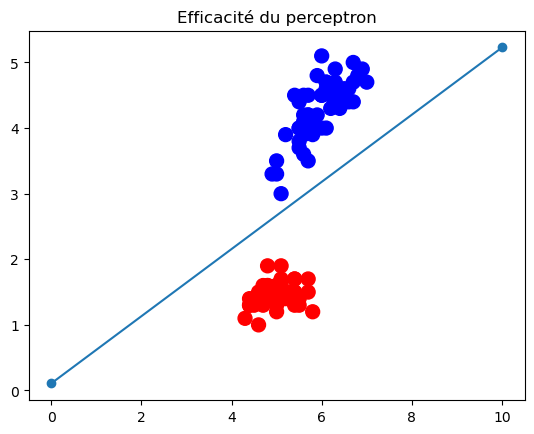

In [9]:
weightX = perceptron.weights[0]
weightY = perceptron.weights[1]
weightBias = perceptron.weights[2]

def formula(x):
	# resolved equation
	y = -(weightX / weightY) * x - weightBias / weightY
	return y

plt.plot([0, 10], [formula(0), formula(10)], marker = 'o')
plt.title('Efficacité du perceptron')
plt.scatter(x=X_data[:, 0], y=X_data[:, 1], c=y_colors, s=100)
plt.show()

# 3 - Evaluation des performances

On cherche maintenant à évaluer la performance du modèle en comparant
de façon quantitative les classes prédites par le modèle avec les classes réelles
fournies dans le jeu de test.

Scikit-Learn propose plusieurs métriques pour obtenir une évaluation quantitative du modèle (voir le package sklearn.metrics) :
- accuracy_score()
- confusion_matrix()
- precision_score()
- recall_score()
- f1_score().

Toutes ces métriques ont été vues en cours. Parcourez la documentation de
ces fonctions puis appliquez les sur votre jeu de test. Analysez les résultats obtenus. Que pouvez-vous en déduire sur l’efficacité de l’algorithme ?

In [10]:
from sklearn.metrics import *


accuracy = accuracy_score(y_true=output_test, y_pred=output_prediction)
confusion = confusion_matrix(y_true=output_test, y_pred=output_prediction)
precision = precision_score(y_true=output_test, y_pred=output_prediction)
recall = recall_score(y_true=output_test, y_pred=output_prediction)
f1 = f1_score(y_true=output_test, y_pred=output_prediction)

print("accuracy : {}".format(accuracy))
print("confusion : \n {}".format(confusion))
print("precision : {}".format(precision))
print("f1 : {}".format(f1))



accuracy : 1.0
confusion : 
 [[ 6  0]
 [ 0 19]]
precision : 1.0
f1 : 1.0


Une façon d’améliorer l’évaluation du modèle est de recourir à la méthode
de validation croisée. Cette méthode a été expliquée en cours. Elle consiste
à découper aléatoirement le jeu d’entraînement en plusieurs sous-ensembles distincts puis à entraîner et à évaluer le modèle en passes successives. A chaque
passe, un bloc est réservé pour l’évaluation et les blocs restants sont utilisés
pour l’entraînement.

Scikit-Learn fournit des éléments pour appliquer cette méthode. La classe
KFold permet de réaliser une validation croisée en K passes et la fonction
cross_val_score() permet d’obtenir les résultats d’une validation croisée (voir
le package sklearn.model_selection).

REMARQUE : Pour pouvoir utiliser la fonction cross_val_score(), il
ne faut plus utiliser la classe Perceptron que vous avez codée mais la classe
Perceptron définie dans Scikit-Learn, qui peut être importée dans le code et
renommée (pour distinguer les 2 classes) comme indiqué ci-dessous :

```python
from sklearn.linear_model import Perceptron as SkPerceptron
```

Après avoir examiné la documentation sur ces différents éléments, construire
une validation croisée de l’algorithme du perceptron sur le jeu de données. La
fonction cross_val_score() retourne un objet dans lequel sont stockés les
résultats. Analysez ces résultats et comparez avec les résultats obtenus précédemment sans validation croisée.

In [ ]:
from sklearn.model_selection import *
from sklearn.linear_model import Perceptron as SkPerceptron

splits = KFold(n_splits=5, shuffle=True).get_n_splits(X=X_data, y=y_data)

cross_val_score(SkPerceptron(max_iter=20), X=X_data, y=y_data, cv=splits)

array([1., 1., 1., 1., 1.])

# 4 - Optionnel : Sauvegarde du modèle entraîné


Lorsque vous avez trouvé un bon modèle pour votre problème, il faut penser
à sa mise en production dans une application. Cela implique de sauvegarder le
modèle entraîné et de vérifier son chargement pour réaliser des prédictions avec
de nouvelles données dans le système en production.

Un modèle produit avec la bibliothèque Scikit-Learn peut être sauvegardé
en utilisant la bibliothèque de sérialisation d’objets qui s’appelle Pickle. Cette
bibliothèque dispose des fonctions dump() et load() pour respectivement sauvegarder et charger le modèle. Examinez la documentation de ces fonctions pour
connaître leurs paramètres et appliquez les dans votre TP.

In [23]:
import pickle

